# Missing Values - featue engineering

# Lifecycle of a data science projects
1. Data collection stratergy---form company, 3rd party api's, surveys
2. Feature engineering --- Handing missing vlaues

Data science project --- dataset should be collected from multiple sources

Data that will be missing---
1. continuous data
2. catogerical data

### What are the different types of Missing data?

## 1️⃣ Missing Completely At Random (MCAR)

Definition:
Data is MCAR when the probability of a value being missing is independent of both observed and unobserved data.
The missingness happens purely by chance.

In simple words:
Missing values have nothing to do with the dataset — it’s just accidental.

Example:

A sensor randomly fails to record temperature.

A survey form is lost in transit.

Random computer error deletes some entries.

Effect on analysis:
MCAR data does not bias your model. You can safely remove those rows.

## 2️⃣ Missing At Random (MAR)

Definition:
Missingness depends on other observed variables, but not on the missing variable itself.

Example:

Women are less likely to disclose salary.

Young people skip income questions.

Here missingness depends on gender or age, which we can observe.

Effect:
Data is biased, but it can be corrected using imputation or modeling.

## 3️⃣ Missing Not At Random (MNAR)

Definition:
Missingness depends on the missing value itself.

Example:

Poor people don’t report income.

Sick patients don’t report health score.

Here the missingness is caused by the hidden value itself.

Effect:
This is the most dangerous type. Simple imputation gives wrong results.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Missing data is having relation b'coz after death there is no one to tell about the age and cabin.

<Axes: >

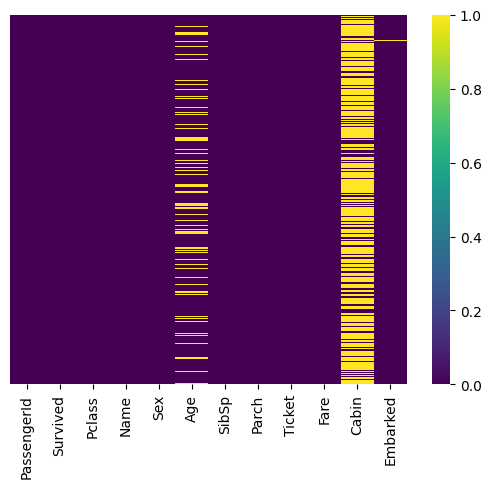

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [6]:
# this is example of missing completely at random
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
# eda
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)
# nan value is replaced by 1
# find the percentage of null values
df['Cabin_null'].mean()

0.7710437710437711

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [9]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

### Missing at random.

## All techniques of handing missing values
1. Mean, Median, Mode realocement
2. Random sample imputation
3. Capturing NAN vlaues with a new feature
4. End of distribution imputation
5. Arbitrary imputation
6. Frequent caegories imputation

## 1. mean, median, mode imputation
#### when should we apply?
mean/meadin has the assumption that the data are missing completely at random(MCAR).
solve this by replacing the NAN with the most frequent occurance of variable.

In [10]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


<Axes: xlabel='Age'>

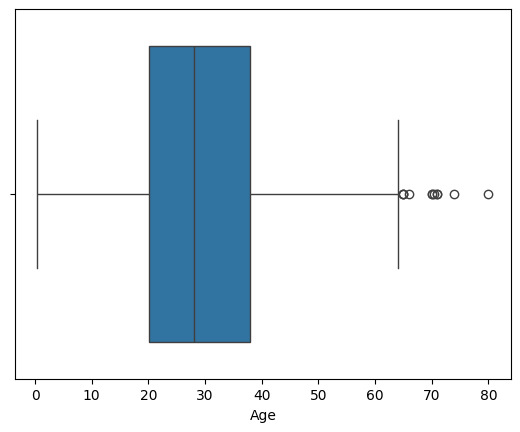

In [11]:
sns.boxplot(x='Age', data=df)

In [12]:
# let's go and see percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
# we need to handle age
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [14]:
median=df.Age.median()
print(median)

28.0


In [15]:
impute_nan(df,'Age',median)
df.head(6)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0


In [16]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


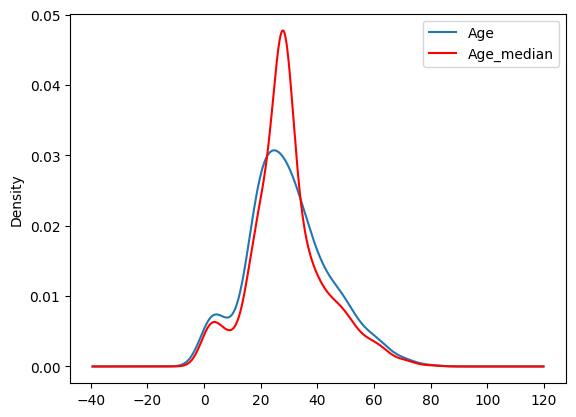

In [17]:
# lets make a graph through the matplotlib
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Adv and disAdv of mean mode imputation
#### Adventages
1. Easy to implement(Robust to outliers)
2. Fater way to obtain the complete dataset

#### Disadvantages
1. If outliers are there they may affect the data
2. Change or distortion in original vaiance
3. it impact corellation

# 2. Random snample imputation
Aim : Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan vlaues.

## When it should be used?
it assume that the data is missing completely at random(MCAR)

In [18]:
import pandas as pd
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived']) 
# Survived is dependent feature
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
print("The missing values :")
df.isnull().sum()

The missing values :


Survived      0
Age         177
Fare          0
dtype: int64

In [20]:
print("missing values in percentage (mean) :")
df.isnull().mean()

missing values in percentage (mean) :


Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

### From the 1st technique

In [21]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [22]:
median=df.Age.median()
median

28.0

In [23]:
impute_nan(df,"Age",median)
df.head(-1)
# we can see NaN is replaced with median(28)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
885,0,39.0,29.1250,39.0
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0


### From 2nd technique

In [24]:
print("Before droping all NaN values shape: ",df['Age'].shape)
print(df['Age'].dropna())
print("After droping NaN vlaues shape: ",df['Age'].dropna().shape)

Before droping all NaN values shape:  (891,)
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64
After droping NaN vlaues shape:  (714,)


In [25]:
# taking Random samples form the droped dataset
print(df['Age'].dropna().sample())
print(df['Age'].dropna().sample())

716    38.0
Name: Age, dtype: float64
445    4.0
Name: Age, dtype: float64


#### we can reall the NaN values with the sample values
### we are using random_state=0 so values get fixed 
#### otherwise vlaues will continuously get changed

In [26]:
df['Age'].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [27]:
df[df["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [28]:

# Making the def to the random_nan for replacing nan values wiht random vlaues
def random_nan(df,variable):
    df[variable+"_random"]=df[variable]
    # It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    # df.loc[row_condition , column_selection]
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [29]:
random_nan(df,"Age")
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


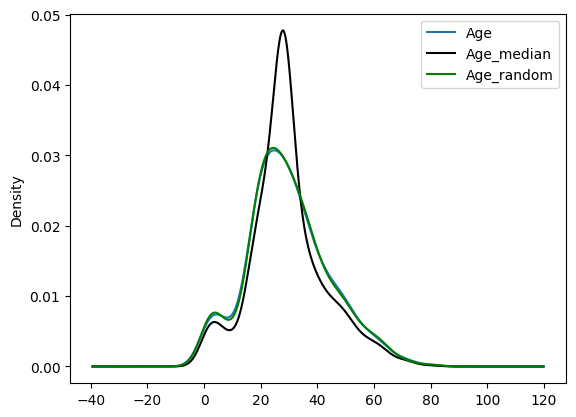

In [30]:
# now we check the distribution
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='black')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Adventages
1. There is no distortion in variance
2. Easy to implement.

## Disadventage
1. Every situation randomness wont work. (ex., finential sectores, business.)

# 3.Capturing NaN values with a new featuer
It works well if the data are "not" missing completely at random.

Capturing NaN values with a new feature works well when the data are missing not at random (MNAR).

In [31]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived']) 
# Survived is dependent feature
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)
# if age is null replace it wiht 1
df.head(6)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1


In [33]:
df.Age.median()

28.0

In [34]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [35]:
df.head(6)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1


# Adventages 
1. Captures the importance of missing values.
2. after filling the values with we can use the Age_nan to tell the model that value was missing originally.
3. Model atleast get some information
4. use only is small number of features have missing values.

# Disadventages
1. Creating additional fatures.(Lead to curse of Dimensionality)

# 4.End of distribution imputation
used for missing completely at random.

We take end of distribution and try to replace it with nan value

In [36]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

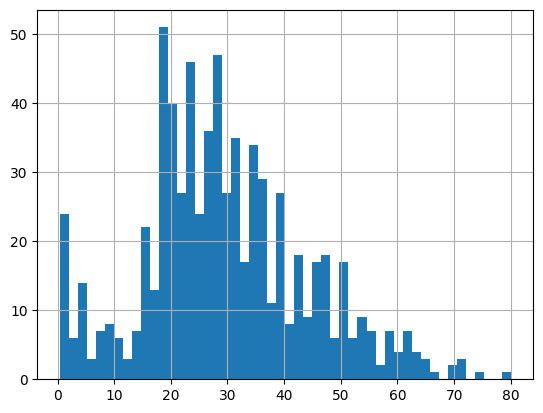

In [37]:
df.Age.hist(bins=50)

In [38]:
# we are going to peek the data from outside of the 3rd standard deviation from +ve side.
extreme=df.Age.mean()+3*df.Age.std()
print(extreme)

73.27860964406095


<Axes: ylabel='Age'>

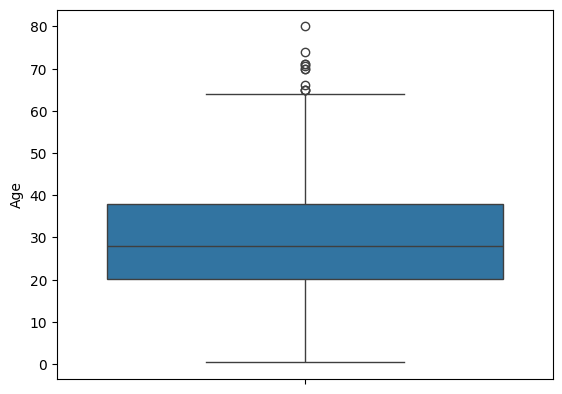

In [39]:
sns.boxplot(df['Age'])

In [40]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_end_distribution']=df[variable].fillna(extreme)

impute_nan(df,'Age',df.Age.median(),extreme)
df.head(6)

,Survived,Age,Fare,Age_median,Age_end_distribution
0,0,22.0,7.2500,22.0,22.00000
1,1,38.0,71.2833,38.0,38.00000
2,1,26.0,7.9250,26.0,26.00000
3,1,35.0,53.1000,35.0,35.00000
4,0,35.0,8.0500,35.0,35.00000
5,0,NaN,8.4583,28.0,73.27861


<Axes: >

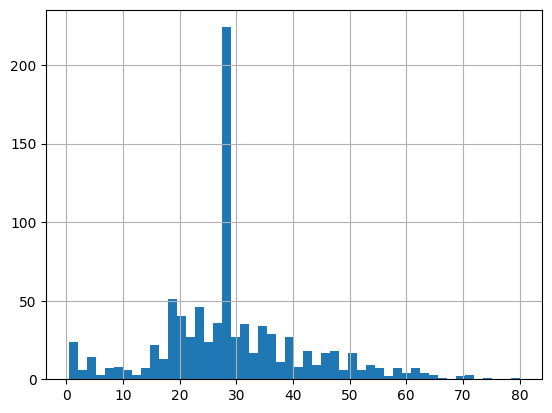

In [41]:
# If we check for the replaced column wiht median 
# all vlaues comes to center.
df['Age_median'].hist(bins=50)

<Axes: >

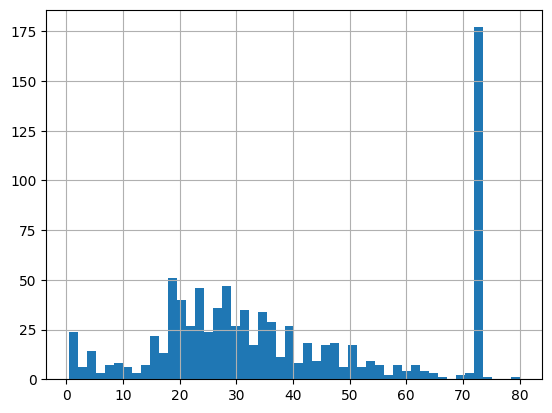

In [42]:
# On replacing the nan vlaues with the extrem on the end of distribution
# we get the values at the right side
df['Age_end_distribution'].hist(bins=50)

['Age', 'Age_median', 'Age_end_distribution']


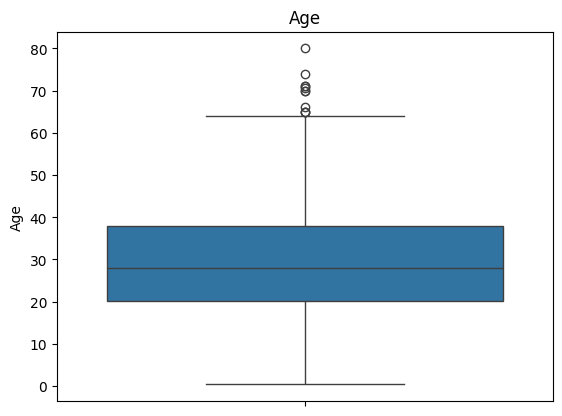

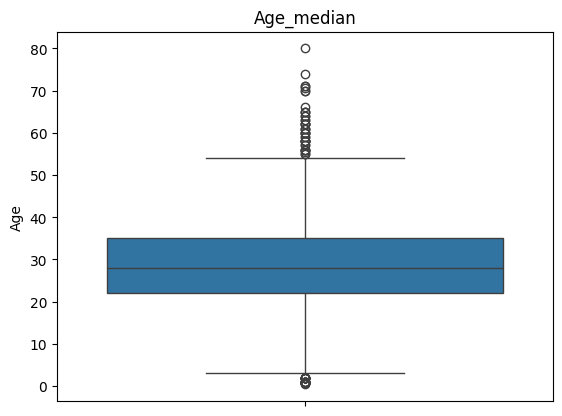

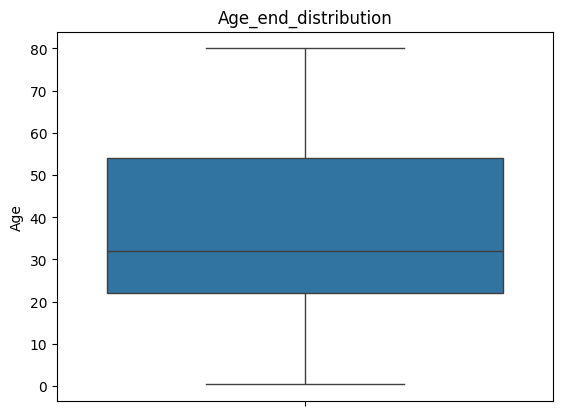

In [43]:
# we will not get outliers in the Age_end_distribution
age_features = [feature for feature in df.columns if "Age" in feature]
print(age_features)

for feature in age_features:
    plt.figure()
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.ylabel("Age")
    plt.show()

# Adventages
1. Capture the importance of missingness if there is one.

# Disadvantages
1. Distorts the original distribution of the variable.
2. if number of na is greater it will make true outliers in the diatribution.
3. if number of na is small then replaced na will be considered as outlier.

# 5.Arbitrary Value Imputation
It consists of replacing NaN by an arbitarary value.

This techniques was derived form kaggle compitation.

Arbiterary value should not be frequentely persent.

In [45]:
df=pd.read_csv("titanic_train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [48]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundered']=df[variable].fillna(100)

<Axes: >

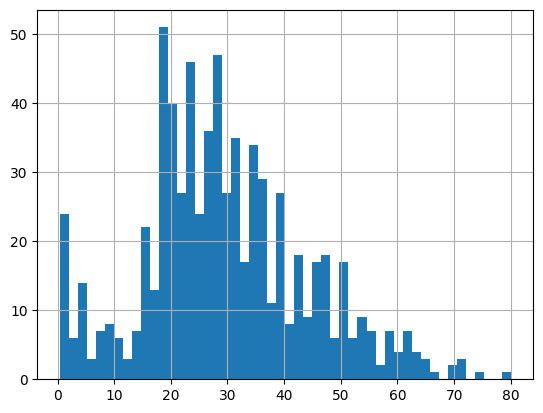

In [47]:
df['Age'].hist(bins=50)

# Arbitery Value
# Adventages:
1. Captures the importance of missingness if there is one.

# Disadventages:
1. Distorts the original distribution of the variable
2. If missing is not important, it may mask the predictive power of the original variable by distortion.
3. Hard to decide which value to use.